##Section 1: Questions to Answer

What questions do you want to answer? 2-5
Can we predict credit card approval based on customer information effectively?
What features have the most impact on credit card approval?
How does income type affect credit card approval?
What role does gender, car ownership, and property ownership play in credit card approval?
Can we identify any patterns in the data that distinguish approved and rejected applications?

Why is your proposal important in today’s world? How predicting a good client is worthy for a bank?  
Ans

Today a lot of banks are going bust because of not identifying the credit worthiness of clients
Especially rich clients

How is it going to impact the banking sector?
If credit worthiness is correctly identified then NPA could be reduced
and

If any, what is the gap in the knowledge or how your proposed method can be helpful if required in future for any bank in Indi

## Hypothesis

Here you have to make some assumptions based on the questions you want to address based on the DA track or ML track.

If DA track please aim to identify patterns in the data and important features that may impact a ML model.

If ML track please perform part ‘i’ as well as multiple machine learning models, perform all required steps to check if there is any assumption and justify your model. Why is your model better than any other possible model? Please justify it by relevant cost functions and if possible by any graph.

From step 1, you may see some relationship that you want to explore and will develop a belief about data

Predicting credit card approval is crucial for risk management and financial stability.
Efficient credit assessments save the bank from potential losses due to defaults.
It impacts the banking sector by improving decision-making processes, leading to better customer satisfaction and reduced financial risks.
The gap lies in leveraging advanced analytics to enhance traditional credit scoring systems, especially in the context of the evolving financial landscape in India.

In [ ]:
from google.colab import files
uploaded=files .upload()

Saving Credit_card.csv to Credit_card.csv


In [ ]:
from google.colab import files
uploaded=files .upload()

Saving Credit_card_label.csv to Credit_card_label.csv


##Section 3: Data analysis approach

What approach are you going to take in order to prove or disprove your hypothesis?

What feature engineering techniques will be relevant to your project?

Please justify your data analysis approach.

Identify important patterns in your data using the EDA approach to justify your findings.

Section 4: Machine learning approach

What method will you use for machine learning based predictions for credit card approval?

Please justify the most appropriate model.

Please perform necessary steps required to improve the accuracy of your model.

Please compare all models (at least 4  models).

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
df=pd.read_csv('Credit_card.csv')
df.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2


In [ ]:

target=pd.read_csv('Credit_card_label.csv')
target

,Ind_ID,label
0,5008827,1
1,5009744,1
2,5009746,1
3,5009749,1
4,5009752,1
...,...,...
1543,5028645,0
1544,5023655,0
1545,5115992,0
1546,5118219,0


In [ ]:
target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Ind_ID  1548 non-null   int64
 1   label   1548 non-null   int64
dtypes: int64(2)
memory usage: 24.3 KB


In [ ]:
df.shape

(1548, 18)

In [ ]:
target.shape

(1548, 2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

In [ ]:
df.describe()

,Ind_ID,CHILDREN,Annual_income,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members
count,1.548000e+03,1548.000000,1.525000e+03,1526.000000,1548.000000,1548.0,1548.000000,1548.000000,1548.000000,1548.000000
mean,5.078920e+06,0.412791,1.913993e+05,-16040.342071,59364.689922,1.0,0.208010,0.309432,0.092377,2.161499
std,4.171759e+04,0.776691,1.132530e+05,4229.503202,137808.062701,0.0,0.406015,0.462409,0.289651,0.947772
min,5.008827e+06,0.000000,3.375000e+04,-24946.000000,-14887.000000,1.0,0.000000,0.000000,0.000000,1.000000
25%,5.045070e+06,0.000000,1.215000e+05,-19553.000000,-3174.500000,1.0,0.000000,0.000000,0.000000,2.000000
50%,5.078842e+06,0.000000,1.665000e+05,-15661.500000,-1565.000000,1.0,0.000000,0.000000,0.000000,2.000000
75%,5.115673e+06,1.000000,2.250000e+05,-12417.000000,-431.750000,1.0,0.000000,1.000000,0.000000,3.000000
max,5.150412e+06,14.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,15.000000


In [ ]:
df['Family_Members']=df['Family_Members'].astype('object')
df['CHILDREN']=df['CHILDREN'].astype('object')
df['Phone']=df['Phone'].astype('object')
df['Mobile_phone']=df['Mobile_phone'].astype('object')
df['Work_Phone']=df['Work_Phone'].astype('object')
df['EMAIL_ID']=df['EMAIL_ID'].astype('object')


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   object 
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   object 
 13  Work_Phone       1548 non-null   object 
 14  Phone            1548 non-null   object 
 15  EMAIL_ID         1548 non-null   object 
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

In [ ]:
df1=df.copy()

In [ ]:
# Drop duplicates
df1.drop_duplicates(inplace=True)

In [ ]:
num_cols= list(df1.select_dtypes(['int','float']).columns)
num_cols= ['Annual_income', 'Birthday_count', 'Employed_days']
num_cols

['Annual_income', 'Birthday_count', 'Employed_days']

In [ ]:
cat_cols=[x for x in df1.columns if x not in num_cols]
cat_cols

['Ind_ID',
 'GENDER',
 'Car_Owner',
 'Propert_Owner',
 'CHILDREN',
 'Type_Income',
 'EDUCATION',
 'Marital_status',
 'Housing_type',
 'Mobile_phone',
 'Work_Phone',
 'Phone',
 'EMAIL_ID',
 'Type_Occupation',
 'Family_Members']

In [ ]:
df1.isnull().sum()

Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
dtype: int64

In [ ]:
#Fillin null values in num cols
import numpy as np

for column in df1.columns:
    if df1[column].dtype == 'int' or df1[column].dtype == 'float':
        df1[column].fillna(df1[column].median(), inplace=True)


In [ ]:
#Checking for null values
df1.Annual_income.isnull().sum()

0

In [ ]:
#Filling null values in cate cols
for column in df1.columns:
  if df1[column].dtype=='object':
    df1[column].fillna(df1[column].mode()[0],inplace=True)




In [ ]:
df1.Type_Occupation.isnull().sum()

0

In [ ]:
df1.isnull().sum()

Ind_ID             0
GENDER             0
Car_Owner          0
Propert_Owner      0
CHILDREN           0
Annual_income      0
Type_Income        0
EDUCATION          0
Marital_status     0
Housing_type       0
Birthday_count     0
Employed_days      0
Mobile_phone       0
Work_Phone         0
Phone              0
EMAIL_ID           0
Type_Occupation    0
Family_Members     0
dtype: int64

##CONVERTING BIRTHDAY COLUMN AND EMPLOYED DAYS INTO YEARS

In [ ]:
df1['Age']=[round(abs(x/365),0) for x in df['Birthday_count']]
df1['Age'].value_counts()
df1['Age'] = df1['Age'].fillna(df1['Age'].median())


In [ ]:
df1


,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,Age
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,Laborers,2,51.0
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,Laborers,2,37.0
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-15661.5,-586,1,1,1,0,Laborers,2,43.0
3,5009749,F,Y,N,0,166500.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,Laborers,2,37.0
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,Laborers,2,37.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,F,N,Y,0,166500.0,Commercial associate,Higher education,Married,House / apartment,-11957.0,-2182,1,0,0,0,Managers,2,33.0
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,1,0,0,0,Accountants,1,28.0
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,1,0,0,0,Managers,4,36.0
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.0,-645,1,1,1,0,Drivers,2,42.0


In [ ]:

# Calculate "Employed_years" based on "Employed_days" (assuming 365 days in a year)
df1["Employed_years"] = df1["Employed_days"].apply(lambda x: round(abs(x) / 365, 1) if x is not None else None)

# Handle positive values (unemployment) by setting them to 0 years
df1['Employed_years']=df1.apply(lambda x: 0 if x['Employed_days']>0 else x['Employed_years'],axis=1)
df1["Employed_years"].value_counts()

0.0     261
1.4      21
0.4      21
0.6      21
2.5      19
       ... 
22.3      1
37.6      1
25.4      1
25.9      1
11.6      1
Name: Employed_years, Length: 227, dtype: int64

In [ ]:
df1['Car_Owner']
df1['Family_Members'].value_counts()
df1['EDUCATION'].value_counts()


Secondary / secondary special    1031
Higher education                  426
Incomplete higher                  68
Lower secondary                    21
Academic degree                     2
Name: EDUCATION, dtype: int64

SQL

Use MySQL or PyMySQL to perform the below queries.

Note: Use only the cleaned data for SQL part of the project


Group the customers based on their income type and find the average of their annual income.

Find the female owners of cars and property.

Find the male customers who are staying with their families.

Please list the top five people having the highest income.

How many married people are having bad credit?

What is the highest education level and what is the total count?

Between married males and females, who is having more bad credit?

In [ ]:
import duckdb
conn=duckdb.connect()
conn.register('df1',df1)
conn.register('target',target)

In [ ]:
conn.execute("select * from df1")
conn.execute("select * from target")

In [ ]:
# Group the customers based on their income type and find the average of their annual income.
# Assuming conn is your database connection
query = "SELECT Type_income, AVG(Annual_income) AS average_income FROM df1 GROUP BY Type_income"
result_df = pd.read_sql_query(query, conn)
print(result_df)


            Type_Income  average_income
0             Pensioner   155343.496283
1               Working   180848.210526
2         State servant   211422.413793
3  Commercial associate   233107.397260


<ipython-input-28-f6549d95b28d>:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  result_df = pd.read_sql_query(query, conn)


#Q2 Find the female owners of cars and property.

In [ ]:
query2 = "SELECT Ind_ID, gender, Car_Owner, Propert_Owner FROM df1 WHERE gender='F' AND Car_Owner='Y' AND Propert_Owner='Y'"
result2_df = pd.read_sql_query(query2, conn)
print(result2_df)


      Ind_ID GENDER Car_Owner Propert_Owner
0    5018498      F         Y             Y
1    5018501      F         Y             Y
2    5018503      F         Y             Y
3    5024213      F         Y             Y
4    5036660      F         Y             Y
..       ...    ...       ...           ...
174  5048458      F         Y             Y
175  5023719      F         Y             Y
176  5033520      F         Y             Y
177  5024049      F         Y             Y
178  5053790      F         Y             Y

[179 rows x 4 columns]


<ipython-input-29-a2c266b79a5a>:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  result2_df = pd.read_sql_query(query2, conn)


Find the male customers who are staying with their families.

In [ ]:
query_male_family = "SELECT Ind_ID, gender, Family_Members FROM df1 WHERE gender='M' AND Family_Members > 1"
result_male_family = pd.read_sql_query(query_male_family, conn)
print(result_male_family)


      Ind_ID GENDER  Family_Members
0    5008827      M               2
1    5010864      M               3
2    5010868      M               3
3    5021303      M               3
4    5021310      M               2
..       ...    ...             ...
465  5096856      M               2
466  5090942      M               2
467  5118268      M               3
468  5115992      M               4
469  5118219      M               2

[470 rows x 3 columns]


<ipython-input-30-84a8bd61de81>:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  result_male_family = pd.read_sql_query(query_male_family, conn)


In [ ]:
#Please list the top five people having the highest income.
top_5_people="SELECT ind_ID,Annual_income from df1 order by Annual_income desc limit 5"
result_top_5=pd.read_sql_query(top_5_people,conn)
print(result_top_5)

    Ind_ID  Annual_income
0  5143231      1575000.0
1  5143235      1575000.0
2  5090470       900000.0
3  5079016       900000.0
4  5079017       900000.0


<ipython-input-31-de1fb895cf75>:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  result_top_5=pd.read_sql_query(top_5_people,conn)


In [ ]:
##How many married people are having bad credit?
import duckdb

# Assuming conn is your DuckDB connection
conn = duckdb.connect(database=':memory:', read_only=False)

# Assuming df1 and target are your DataFrames
# Assuming you have already registered your DataFrames as tables in DuckDB

# Execute the SQL query
query4 = """
SELECT  COUNT(*) AS num_married_bad_credit
FROM df1
JOIN target ON df1.Ind_ID = target.Ind_ID
WHERE df1.Marital_Status = 'Married' AND target.label = 1;
"""

result4 = conn.execute(query4).fetchall()

# Print the result
print(result4)



[(114,)]


In [ ]:
# What is the highest education level and what is the total count?
query5="SELECT COUNT(EDUCATION) AS HIGHEST_EDUCATION_COUNT FROM df1 WHERE EDUCATION='Academic degree'"
result5=conn.execute(query5).fetchall()
print(result5)

[(2,)]


 ##Between married males and females, who is having more bad credit?

In [ ]:
query6 = """
SELECT COUNT(*) as married_males FROM df1
INNER JOIN target ON df1.Ind_ID = target.Ind_ID
WHERE df1.Marital_Status = 'Married' AND df1.gender = 'M' AND target.label = 1
UNION
SELECT COUNT(*) as married_females FROM df1
INNER JOIN target ON df1.Ind_ID = target.Ind_ID
WHERE df1.Marital_Status = 'Married' AND df1.gender = 'F' AND target.label = 1
"""

result6 = conn.execute(query6).fetchall()
print(result6)


[(63,), (51,)]


##Univariate Analysis
#numerical columns (Visualisation)

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

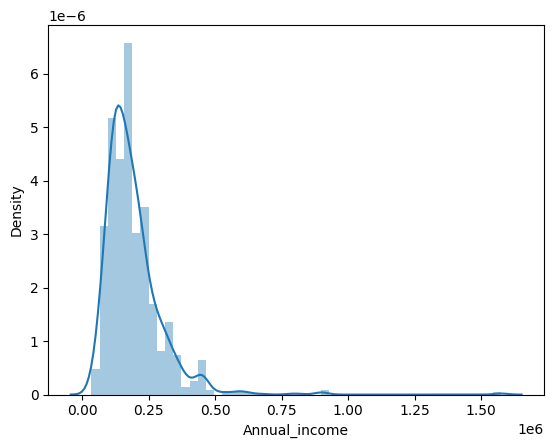

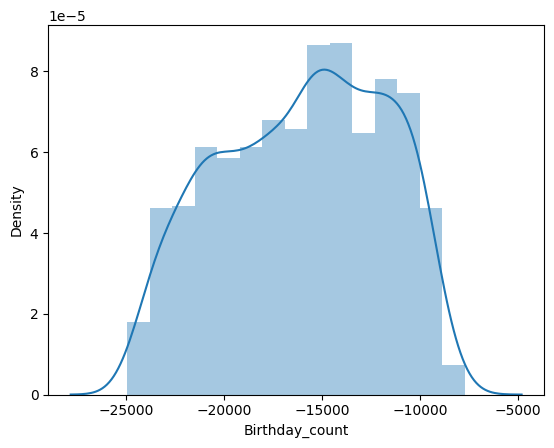

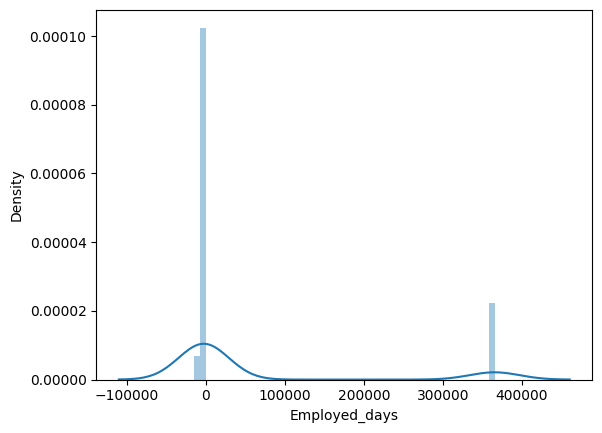

In [ ]:
for i in num_cols:
    sns.distplot(df1[i])
    plt.show()

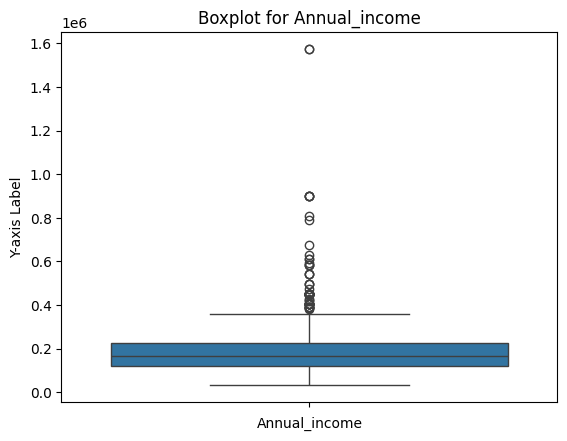

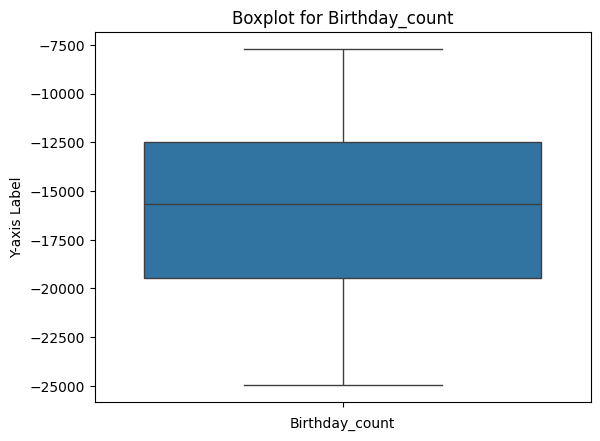

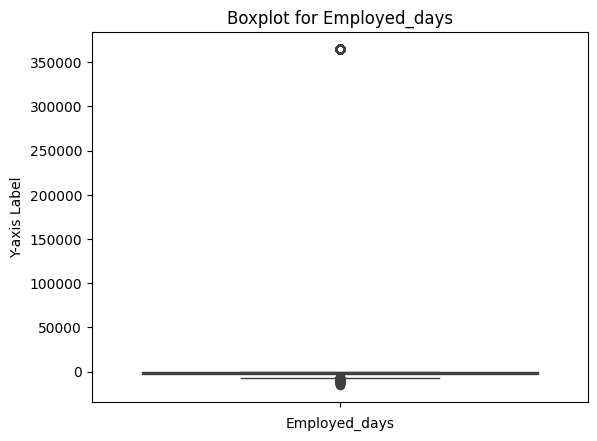

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming num_cols is a list of column names
for i in num_cols:
    sns.boxplot(df1[i])
    plt.xlabel(i)  # Replace "X-axis Label" with your desired label
    plt.ylabel("Y-axis Label")  # Replace "Y-axis Label" with your desired label
    plt.title(f'Boxplot for {i}')  # Set a title if needed
    plt.show()

##Visiualizing Categorigal Columns

In [ ]:
df1['Car_Owner'].value_counts()

N    924
Y    624
Name: Car_Owner, dtype: int64

In [ ]:
df['EDUCATION'].value_counts()

Secondary / secondary special    1031
Higher education                  426
Incomplete higher                  68
Lower secondary                    21
Academic degree                     2
Name: EDUCATION, dtype: int64

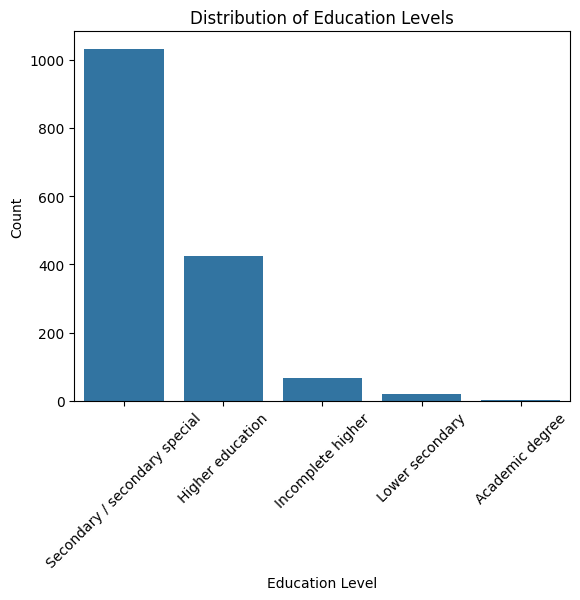

In [ ]:
import seaborn as sns
education_counts = df1['EDUCATION'].value_counts()

# Create a bar plot using Seaborn
sns.barplot(x=education_counts.index, y=education_counts.values)
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Distribution of Education Levels')
plt.xticks(rotation=45) ; # Rotate x-axis labels for better visibility

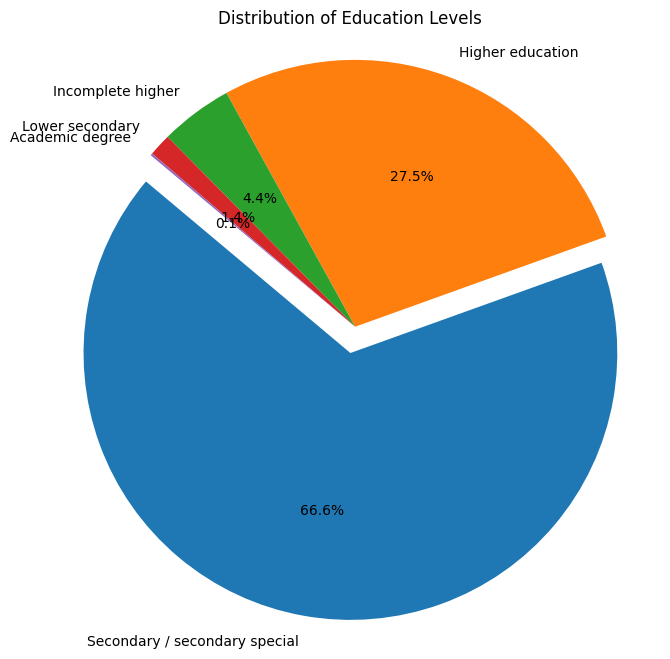

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df' with an 'EDUCATION' column
education_counts = df['EDUCATION'].value_counts()

# Create a pie plot using Matplotlib
plt.figure(figsize=(8, 8))  # Set the figure size

# Define labels and sizes for the pie chart
labels = education_counts.index
sizes = education_counts.values

# Explode a slice (optional)
explode = (0.1, 0, 0, 0, 0)

# Create the pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, explode=explode)

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Distribution of Education Levels')
plt.show();

In [ ]:
df1['Propert_Owner'].value_counts()

Y    1010
N     538
Name: Propert_Owner, dtype: int64

In [ ]:
marital_staus=df1['Marital_status'].value_counts()

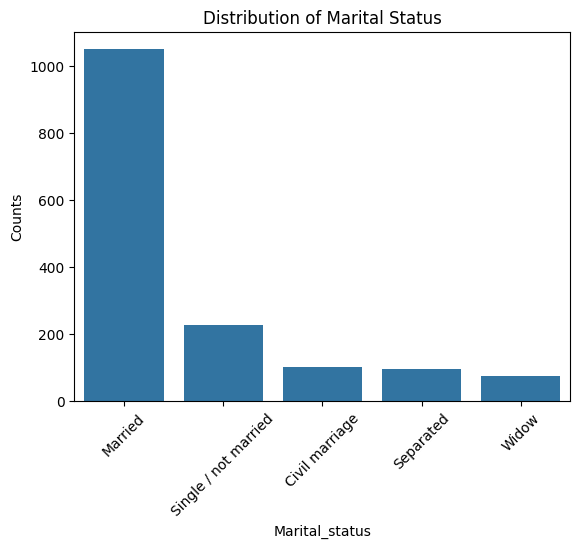

In [ ]:
marital_staus=df1['Marital_status'].value_counts()
plt
sns.barplot(x=marital_staus.index,y=marital_staus.values)
plt.xlabel('Marital_status')
plt.ylabel('Counts')
plt.title('Distribution of Marital Status')
plt.xticks(rotation=45);

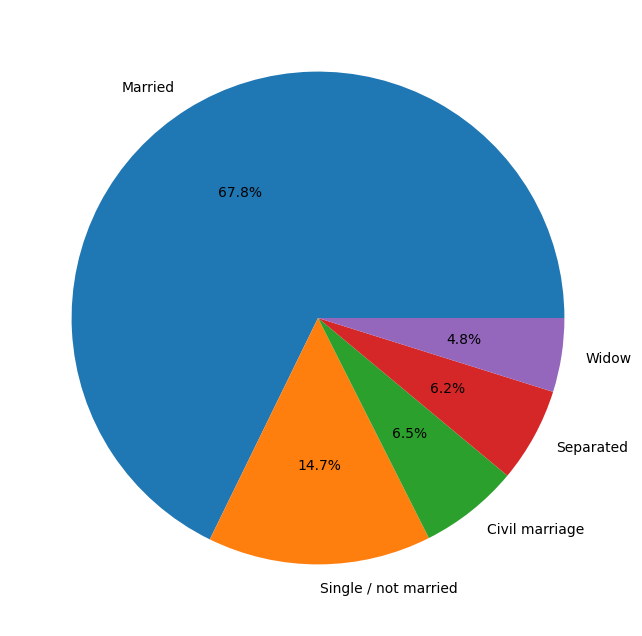

In [ ]:
marital_status=df1['Marital_status'].value_counts()
plt.figure(figsize=(8, 8))  # Set the figure size
labels=marital_status.index
sizes=marital_status.values
plt.pie(sizes,labels=labels,autopct='%1.1f%%');

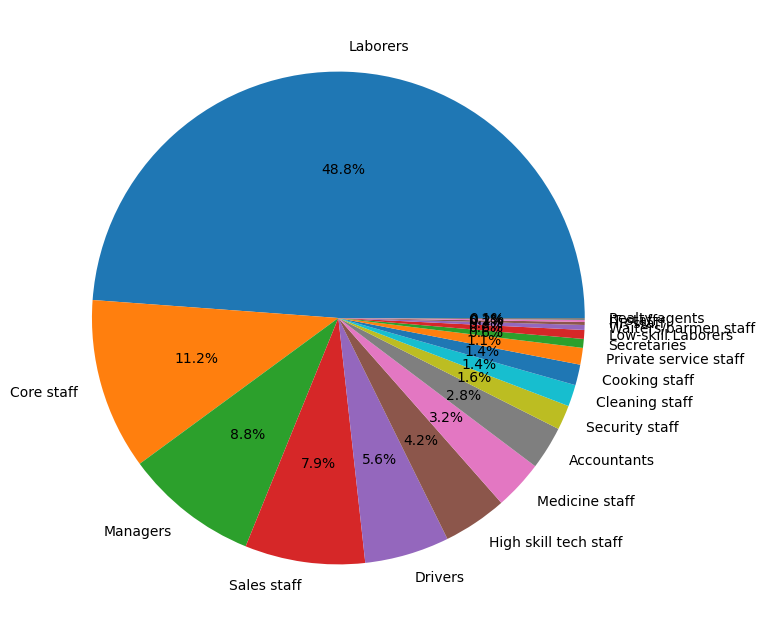

In [ ]:
Type_Occupation=df1['Type_Occupation'].value_counts()
plt.figure(figsize=(8, 8))  # Set the figure size
labels=Type_Occupation.index
sizes=Type_Occupation.values
plt.pie(sizes,labels=labels,autopct='%1.1f%%');

In [ ]:
df1['Type_Income'].value_counts()

Working                 798
Commercial associate    365
Pensioner               269
State servant           116
Name: Type_Income, dtype: int64

##Bivariate Analysis

In [ ]:
df1.drop(['Birthday_count','Employed_days'],axis=1,inplace=True)

In [ ]:
num_cols=list(df1.select_dtypes(['int','float']).columns)

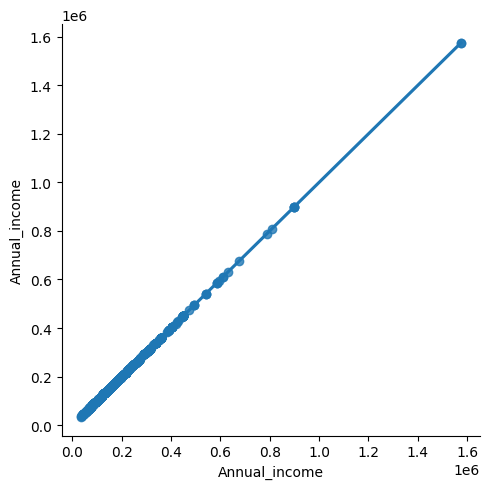

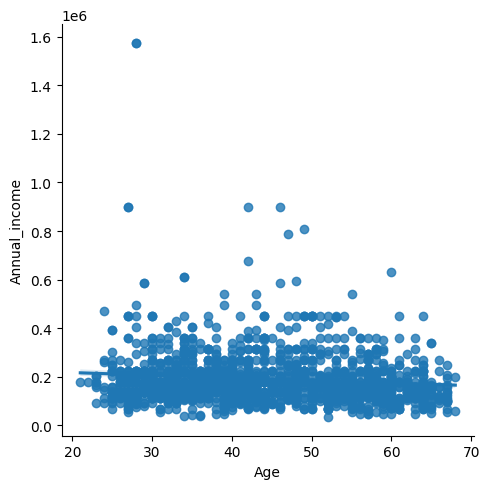

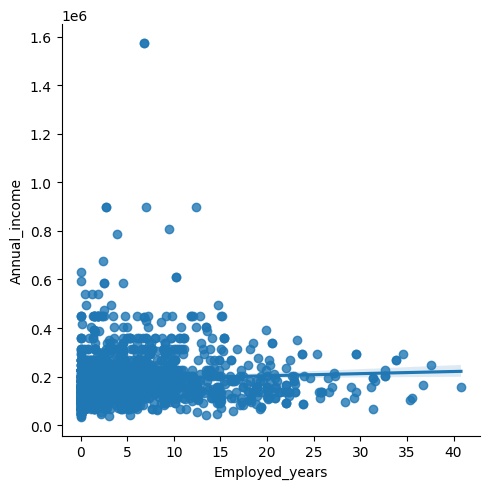

In [ ]:
for i in num_cols:
    if i != 'Ind_ID':
        sns.lmplot(x=i, y='Annual_income', data=df1)
        plt.show()

##Mutivariate Analysis

<Axes: >

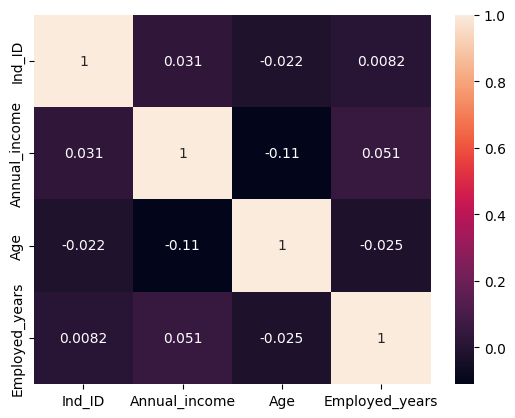

In [ ]:
corr=df1.corr()
sns.heatmap(df1.corr(),annot=True)

We can see thet there no strong corelation between the variables

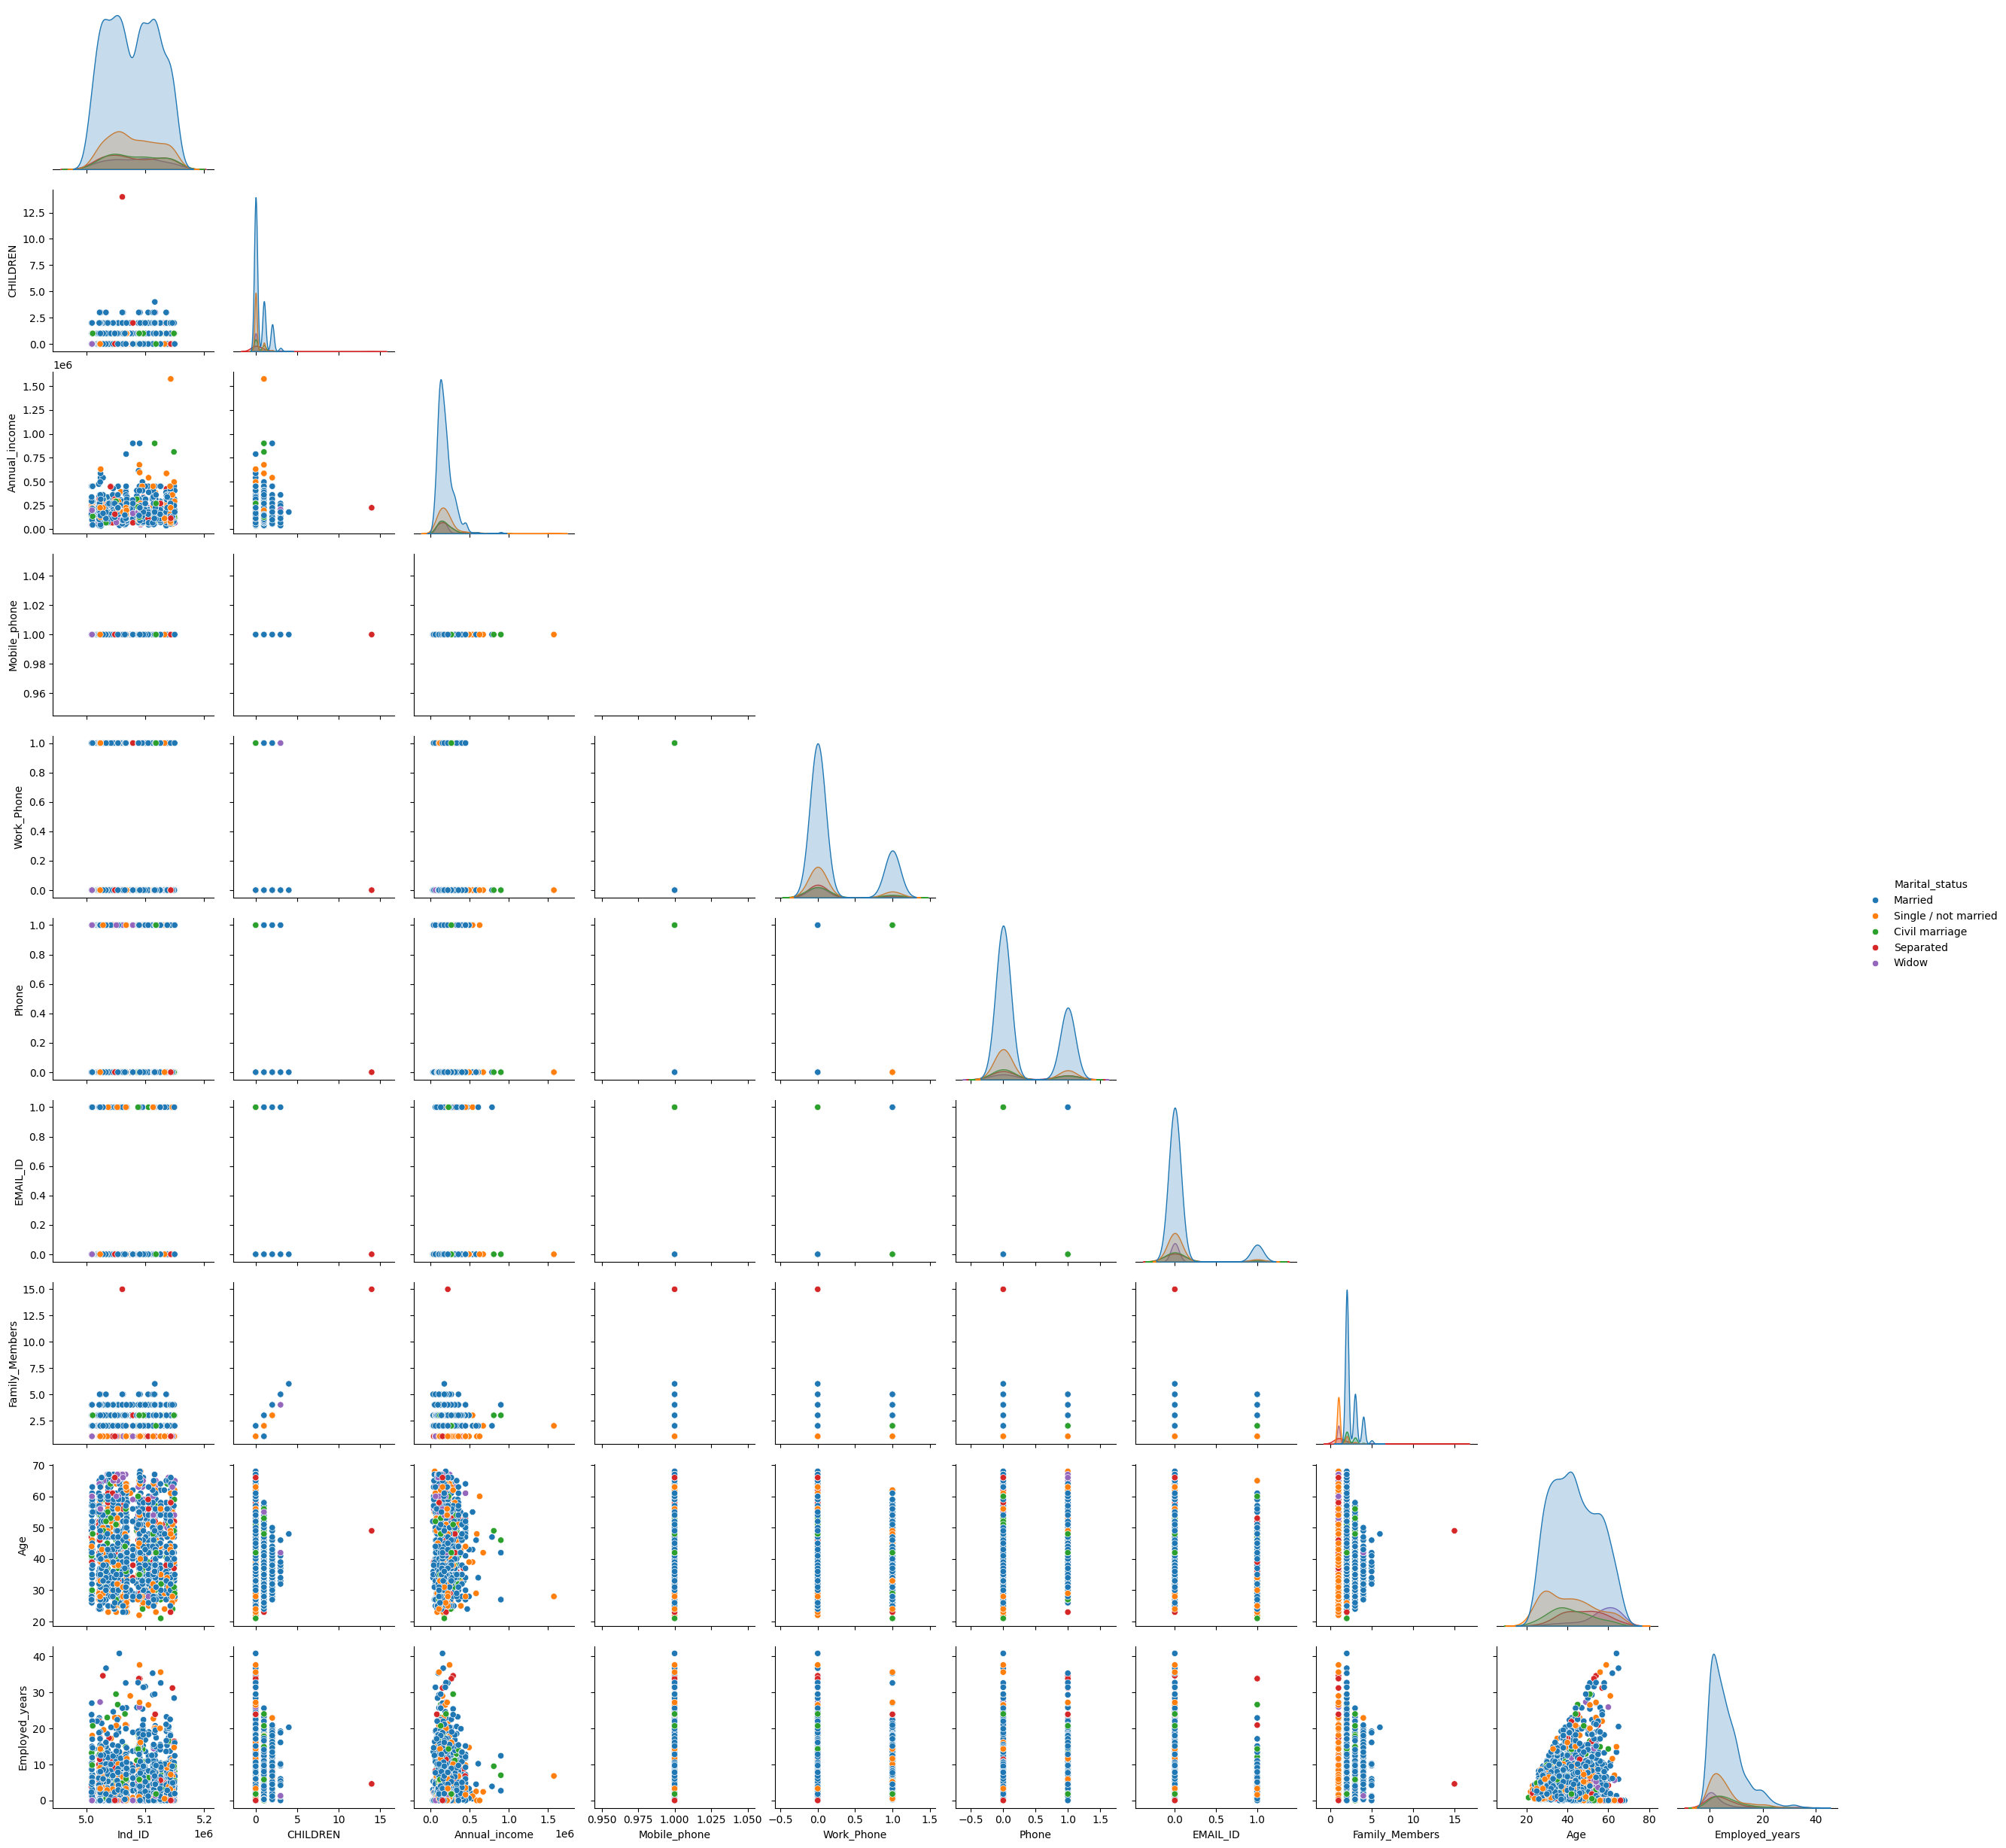

In [ ]:
sns.pairplot(df1,hue='Marital_status',corner=True)

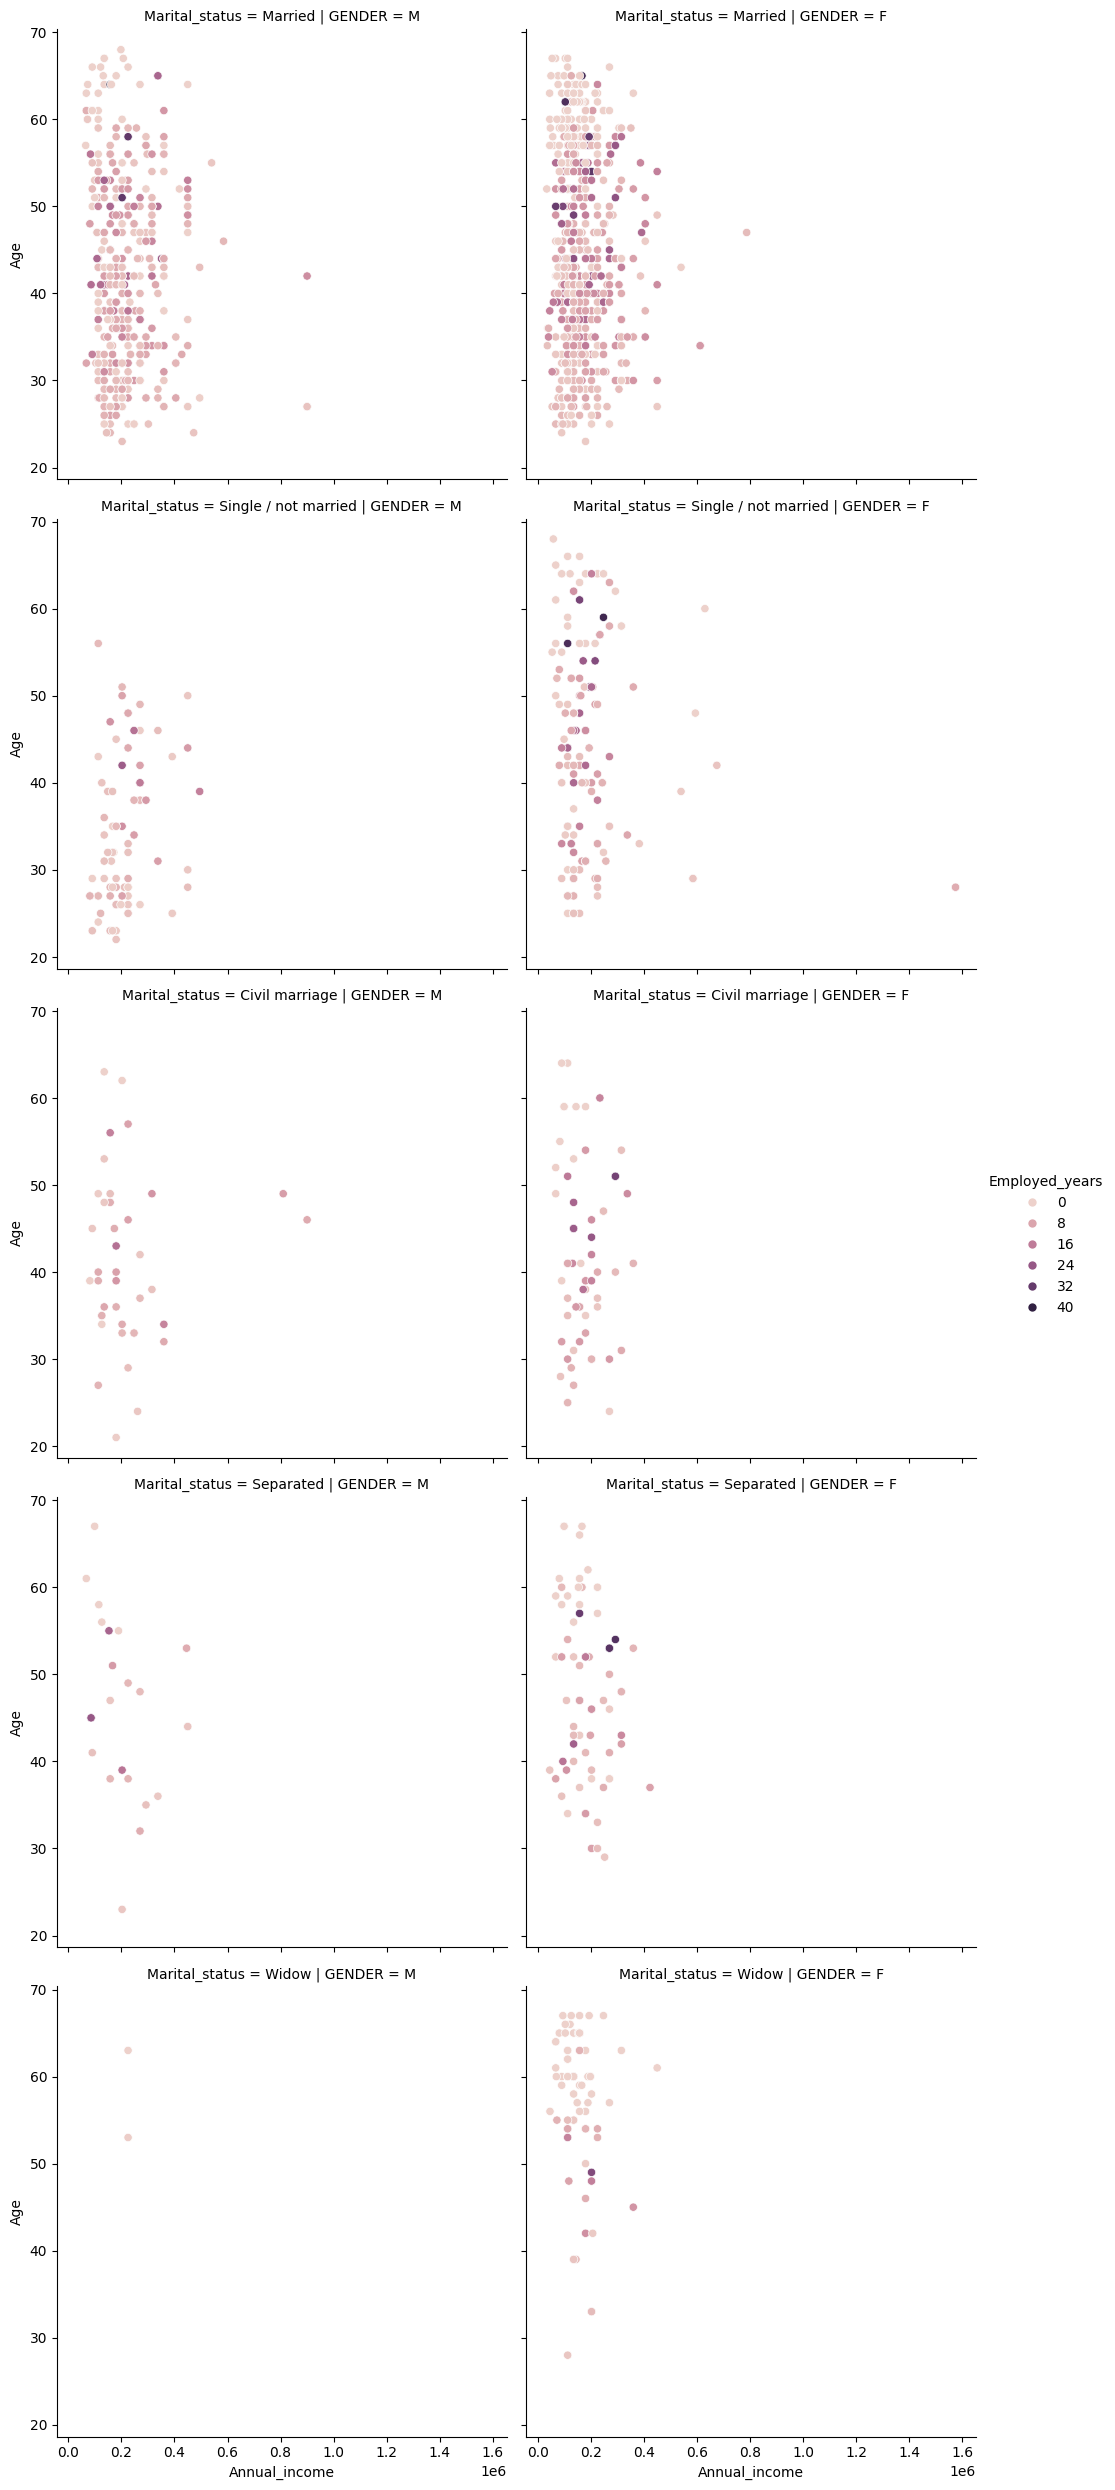

In [ ]:
sns.relplot(x='Annual_income', y='Age',data=df1,hue = 'Employed_years', row='Marital_status',col='GENDER');

#Outlier detection

In [ ]:

num_cols

['Ind_ID', 'Annual_income', 'Age', 'Employed_years']

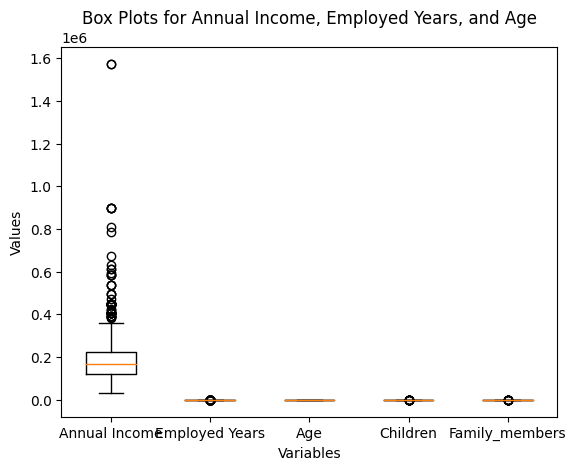

In [ ]:
import matplotlib.pyplot as plt



# Create box plots
plt.boxplot([df1.Annual_income, df1.Employed_years, df1.Age,df1.CHILDREN,df1.Family_Members], labels=['Annual Income', 'Employed Years', 'Age','Children','Family_members'])

# Customize the appearance
plt.title('Box Plots for Annual Income, Employed Years, and Age')
plt.xlabel('Variables')
plt.ylabel('Values')

# Show the figure
plt.show()


In [ ]:
def outlier_treat(df,column):
 q1=df1[column].quantile(.25)
 q3=df1[column].quantile(.75)
 IQR=q3-q1
 lower=q1-(1.5+IQR)
 upper=q3+(1.5+IQR)
 return lower,upper

In [ ]:
lower,upper=outlier_treat(df1,'Annual_income')
print(lower)
print(upper)

17998.5
328501.5


In [ ]:
df1['Annual_income'] = np.where(df1['Annual_income'] < lower, lower,
                               np.where(df1['Annual_income'] > upper, upper, df1['Annual_income']))

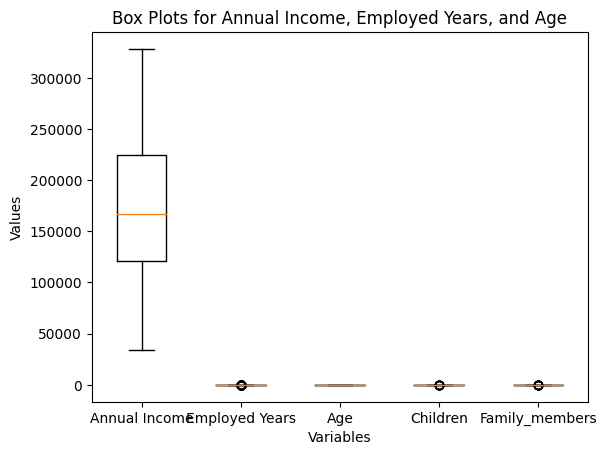

In [ ]:
import matplotlib.pyplot as plt



# Create box plots
plt.boxplot([df1.Annual_income, df1.Employed_years, df1.Age,df.CHILDREN,df1.Family_Members], labels=['Annual Income', 'Employed Years', 'Age','Children','Family_members'])

# Customize the appearance
plt.title('Box Plots for Annual Income, Employed Years, and Age')
plt.xlabel('Variables')
plt.ylabel('Values')

# Show the figure
plt.show()

##Hypothesis testing

Do number of children ,number of family members,age,education and annual income affect whwther a person can get a credit card

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency, fisher_exact

# Create a sample DataFrame (replace this with your data)


# Create a contingency table (cross-tabulation)
contingency_table = pd.crosstab(df['CHILDREN'], target['label'])

# Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-squared statistic: {chi2}")
print(f"P-value: {p}")
contingency_table

Chi-squared statistic: 10.890732325835621
P-value: 0.05359000063892279


label,0,1
CHILDREN,,
0,965,126
1,269,36
2,122,12
3,16,0
4,0,1
14,1,0


In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency, fisher_exact

# Create a sample DataFrame (replace this with your data)


# Create a contingency table (cross-tabulation)
contingency_table = pd.crosstab(df1['GENDER'], target['label'])

# Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-squared statistic: {chi2}")
print(f"P-value: {p}")
contingency_table

Chi-squared statistic: 2.935630436512684
P-value: 0.08664483091132888


label,0,1
GENDER,,
F,880,100
M,493,75


In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency, fisher_exact

# Create a sample DataFrame (replace this with your data)


# Create a contingency table (cross-tabulation)
contingency_table = pd.crosstab(df['Propert_Owner'], target['label'])

# Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-squared statistic: {chi2}")
print(f"P-value: {p}")
contingency_table


Chi-squared statistic: 0.38467918054883476
P-value: 0.5351095955412992


label,0,1
Propert_Owner,,
N,473,65
Y,900,110


In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency, fisher_exact

# Create a sample DataFrame (replace this with your data)


# Create a contingency table (cross-tabulation)
contingency_table = pd.crosstab(df['EDUCATION'], target['label'])

# Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-squared statistic: {chi2}")
print(f"P-value: {p}")
contingency_table


Chi-squared statistic: 9.205670423908046
P-value: 0.056159329722052835


label,0,1
EDUCATION,,
Academic degree,2,0
Higher education,371,55
Incomplete higher,63,5
Lower secondary,15,6
Secondary / secondary special,922,109


In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency, fisher_exact

# Create a sample DataFrame (replace this with your data)


# Create a contingency table (cross-tabulation)
contingency_table = pd.crosstab(df['Type_Occupation'], target['label'])

# Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-squared statistic: {chi2}")
print(f"P-value: {p}")
contingency_table

Chi-squared statistic: 37.22547560916544
P-value: 0.0031362182876011747


label,0,1
Type_Occupation,,
Accountants,39,5
Cleaning staff,20,2
Cooking staff,17,4
Core staff,151,23
Drivers,77,9
HR staff,3,0
High skill tech staff,58,7
IT staff,0,2
Laborers,240,28


In [ ]:
import pandas as pd

# Replace 'Education_level' with the actual column name in your DataFrame
secondary_group = df[df['EDUCATION'] == 'Secondary / secondary special']['Annual_income']
higher_edu_group = df[df['EDUCATION'] == 'Higher education']['Annual_income']
incomplete_higher_group = df[df['EDUCATION'] == 'Incomplete higher']['Annual_income']
lower_secondary_group = df[df['EDUCATION'] == 'Lower secondary']['Annual_income']
academic_degree_group = df[df['EDUCATION'] == 'Academic degree']['Annual_income']

In [ ]:
import scipy.stats as stats

# Perform one-way ANOVA
f_statistic, p_value = stats.f_oneway(secondary_group, higher_edu_group, incomplete_higher_group, lower_secondary_group, academic_degree_group)

# Check the p-value to determine significance
if p_value < 0.05:
    print("There is a significant difference in annual income among different education groups.")
else:
    print("There is no significant difference in annual income among different education groups.")
print(f_statistic)
print(p_value)

There is no significant difference in annual income among different education groups.
nan
nan


##Feature Engineering columns Annual Income and Employed Years

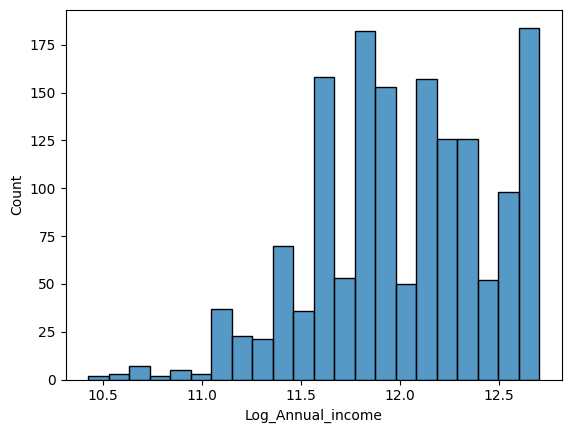

In [ ]:

import numpy as np

# Assuming you have a DataFrame or arrays with the relevant data
# Here's how to apply log transformation to 'Annual Income' and 'Employed Years'

# Log transformation of 'Annual Income'
df1['Log_Annual_income'] = np.log(df1['Annual_income'])

# Log transformation of 'Employed Years'
df1['Log_Employed_Years'] = np.log(df1['Employed_years'])
sns.histplot(df1['Log_Annual_income']);

##Bivariate Analysis-Categoriacal

1.Does Gender,property ownership and carownership,type of occupation  have any effect on card approval

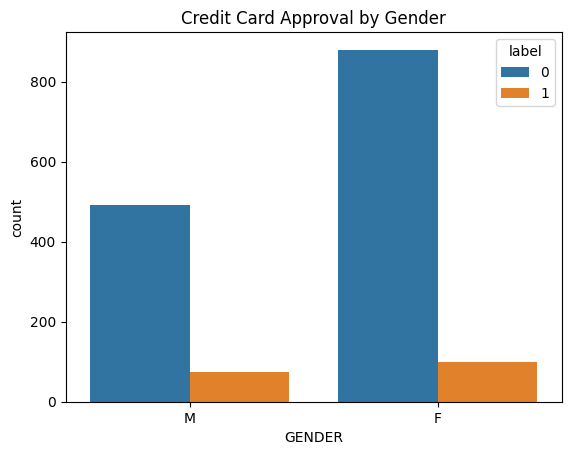

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' with 'gender' and 'credit_approval' columns
sns.countplot(x=df1['GENDER'], hue=target['label'], data=df1)
plt.title('Credit Card Approval by Gender')
plt.show()



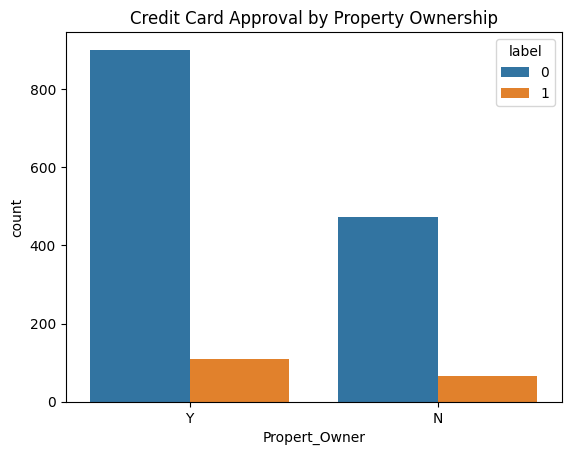

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' with 'gender' and 'credit_approval' columns
sns.countplot(x=df1['Propert_Owner'], hue=target['label'], data=df1)
plt.title('Credit Card Approval by Property Ownership')
plt.show()

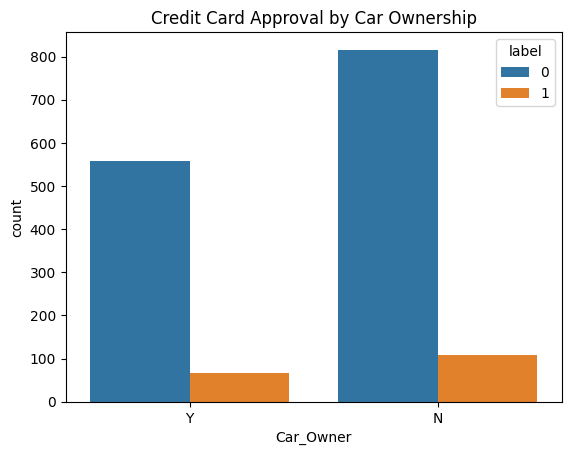

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' with 'gender' and 'credit_approval' columns
sns.countplot(x=df1['Car_Owner'], hue=target['label'], data=df1)
plt.title('Credit Card Approval by Car Ownership')
plt.show()

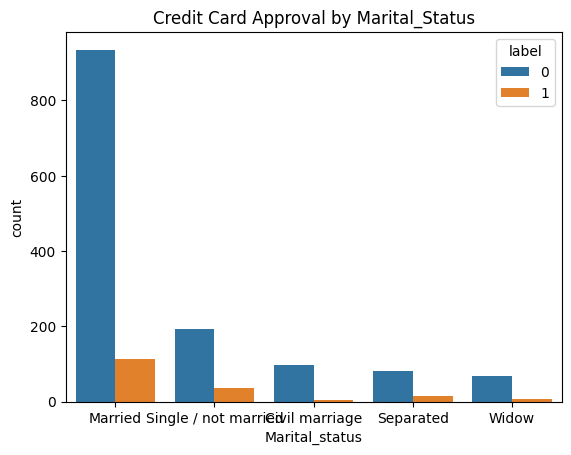

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' with 'gender' and 'credit_approval' columns
sns.countplot(x=df1['Marital_status'], hue=target['label'], data=df1)
plt.title('Credit Card Approval by Marital_Status')
plt.show()

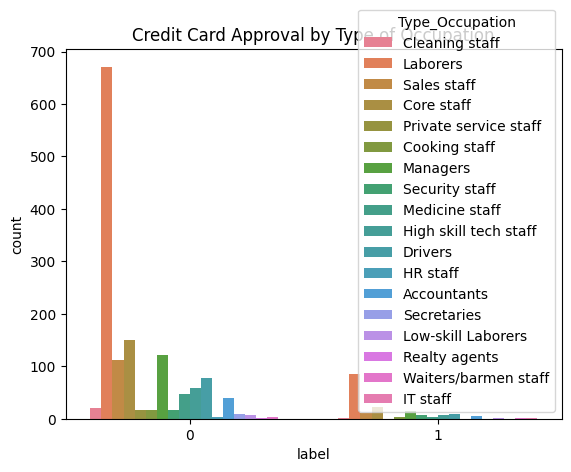

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df1' with 'label' and 'Type_Occupation' columns
sns.countplot(x=target['label'], hue='Type_Occupation', data=df1)
plt.title('Credit Card Approval by Type of Occupation')
plt.show()


In [ ]:
mapper_car={'Y':1,'N':0}
df1['Car_Owner'].replace(mapper_car,inplace=True)


In [ ]:
mapper_prop_owner={'Y':1,'N':0}
df1['Propert_Owner'].replace(mapper_prop_owner,inplace=True)

In [ ]:
mapper_educ={'Academic degree':5,'Incomplete higher':3,'Higher education':4,'Secondary / secondary special':2,'Lower secondary':1}
df1['EDUCATION'].replace(mapper_educ,inplace=True)

In [ ]:
mapper_gender={'M':0,'F':1}
df1['GENDER'].replace(mapper_gender,inplace=True)

In [ ]:
df1['Type_Income'].unique()
mapper_income={'State servant':5,'Pensioner':2,'Commercial associate':3,'Working':4}
df1['Type_Income'].replace(mapper_income,inplace=True)

In [ ]:
df1['Housing_type'].unique()
mapper_housing={'House / apartment':5,'With parents':3,'Municipal apartment':4,'Rented apartment':2,'Co-op apartment':4,'Office apartment':4}
df1['Housing_type'].replace(mapper_housing,inplace=True)

In [ ]:
df1['Marital_status'].unique()

array(['Married', 'Single / not married', 'Civil marriage', 'Separated',
       'Widow'], dtype=object)

In [ ]:
df1['Marital_status'].unique()
mapper_married={'Married':2,'Single / not married':1,'Separated':1,'Widow':2,'Civil marriage':2}
df1['Marital_status'].replace(mapper_married,inplace=True)

In [ ]:
df1['Type_Occupation'].unique()
mapper_occupation={'Laborers':4,'Core staff':3,'Sales staff':3,'Accountants':3,'High skill tech staff':5,'Managers':5,'Cleaning staff':3,'Drivers':3,
'Low-skill Laborers':3,'IT staff':4,'Waiters/barmen staff':3,'Security staff':2,'Medicine staff':3,'Private service staff':3,'HR staff':3,'Secretaries':3,
'Realty agents':4 ,'Cooking staff':3}
df1['Type_Occupation'].replace(mapper_occupation,inplace=True)

In [ ]:
df1['Family_Members'].unique()
mapper_family={'1':7,'2':6,'3':5,'4':4,'5':3,'6':2,'15':1}
df1['Family_Members'].replace(mapper_family,inplace=True)

In [ ]:
df1['CHILDREN'].unique()
mapper_children={'0':6,'1':5,'2':4,'3':3,'4':2,'14':1}
df1['CHILDREN'].replace(mapper_children,inplace=True)

In [ ]:
num_cols=[ 'Annual_income', 'Age', 'Employed_years','Log_Annual_income','Log_Employed_Years']
num_cols

['Annual_income',
 'Age',
 'Employed_years',
 'Log_Annual_income',
 'Log_Employed_Years']

In [ ]:
cat_cols

['Ind_ID',
 'GENDER',
 'Car_Owner',
 'Propert_Owner',
 'CHILDREN',
 'Type_Income',
 'EDUCATION',
 'Marital_status',
 'Housing_type',
 'Mobile_phone',
 'Work_Phone',
 'Phone',
 'EMAIL_ID',
 'Type_Occupation',
 'Family_Members']

In [ ]:
df1



,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,Age,Employed_years,Log_Annual_income,Log_Employed_Years
0,5008827,0,1,1,0,180000.0,2,4,2,5,1,0,0,0,4,2,51.0,0.0,12.100712,-inf
1,5009744,1,1,0,0,315000.0,3,4,2,5,1,1,1,0,4,2,37.0,1.6,12.660328,0.470004
2,5009746,1,1,0,0,315000.0,3,4,2,5,1,1,1,0,4,2,43.0,1.6,12.660328,0.470004
3,5009749,1,1,0,0,166500.0,3,4,2,5,1,1,1,0,4,2,37.0,1.6,12.022751,0.470004
4,5009752,1,1,0,0,315000.0,3,4,2,5,1,1,1,0,4,2,37.0,1.6,12.660328,0.470004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,1,0,1,0,166500.0,3,4,2,5,1,0,0,0,5,2,33.0,6.0,12.022751,1.791759
1544,5023655,1,0,0,0,225000.0,3,3,1,5,1,0,0,0,3,1,28.0,3.3,12.323856,1.193922
1545,5115992,0,1,1,2,180000.0,4,4,2,5,1,0,0,0,5,4,36.0,6.8,12.100712,1.916923
1546,5118219,0,1,0,0,270000.0,4,2,2,5,1,1,1,0,3,2,42.0,1.8,12.506177,0.587787


Feature Scaling

In [ ]:
df1['Log_Employed_Years'].replace(-np.inf,0,inplace=True)
df1['Log_Employed_Years']

0       0.000000
1       0.470004
2       0.470004
3       0.470004
4       0.470004
          ...   
1543    1.791759
1544    1.193922
1545    1.916923
1546    0.587787
1547    2.054124
Name: Log_Employed_Years, Length: 1548, dtype: float64

In [ ]:
df1

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,Age,Employed_years,Log_Annual_income,Log_Employed_Years
0,5008827,0,1,1,0,180000.0,2,4,2,5,1,0,0,0,4,2,51.0,0.0,12.100712,0.000000
1,5009744,1,1,0,0,315000.0,3,4,2,5,1,1,1,0,4,2,37.0,1.6,12.660328,0.470004
2,5009746,1,1,0,0,315000.0,3,4,2,5,1,1,1,0,4,2,43.0,1.6,12.660328,0.470004
3,5009749,1,1,0,0,166500.0,3,4,2,5,1,1,1,0,4,2,37.0,1.6,12.022751,0.470004
4,5009752,1,1,0,0,315000.0,3,4,2,5,1,1,1,0,4,2,37.0,1.6,12.660328,0.470004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,1,0,1,0,166500.0,3,4,2,5,1,0,0,0,5,2,33.0,6.0,12.022751,1.791759
1544,5023655,1,0,0,0,225000.0,3,3,1,5,1,0,0,0,3,1,28.0,3.3,12.323856,1.193922
1545,5115992,0,1,1,2,180000.0,4,4,2,5,1,0,0,0,5,4,36.0,6.8,12.100712,1.916923
1546,5118219,0,1,0,0,270000.0,4,2,2,5,1,1,1,0,3,2,42.0,1.8,12.506177,0.587787


In [ ]:
df1[cat_cols]

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Type_Income,EDUCATION,Marital_status,Housing_type,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
0,5008827,0,1,1,0,2,4,2,5,1,0,0,0,4,2
1,5009744,1,1,0,0,3,4,2,5,1,1,1,0,4,2
2,5009746,1,1,0,0,3,4,2,5,1,1,1,0,4,2
3,5009749,1,1,0,0,3,4,2,5,1,1,1,0,4,2
4,5009752,1,1,0,0,3,4,2,5,1,1,1,0,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,1,0,1,0,3,4,2,5,1,0,0,0,5,2
1544,5023655,1,0,0,0,3,3,1,5,1,0,0,0,3,1
1545,5115992,0,1,1,2,4,4,2,5,1,0,0,0,5,4
1546,5118219,0,1,0,0,4,2,2,5,1,1,1,0,3,2


In [ ]:
df1[num_cols]

,Annual_income,Age,Employed_years,Log_Annual_income,Log_Employed_Years
0,180000.0,51.0,0.0,12.100712,0.000000
1,315000.0,37.0,1.6,12.660328,0.470004
2,315000.0,43.0,1.6,12.660328,0.470004
3,166500.0,37.0,1.6,12.022751,0.470004
4,315000.0,37.0,1.6,12.660328,0.470004
...,...,...,...,...,...
1543,166500.0,33.0,6.0,12.022751,1.791759
1544,225000.0,28.0,3.3,12.323856,1.193922
1545,180000.0,36.0,6.8,12.100712,1.916923
1546,270000.0,42.0,1.8,12.506177,0.587787


In [ ]:
from sklearn.preprocessing import StandardScaler

# Assuming df1 is your DataFrame and num_cols is a list of numerical column names


# Instantiate the StandardScaler
scaler = StandardScaler()

# Fit and transform the numerical columns
stand_num_cols = scaler.fit_transform(df1[num_cols])



In [ ]:
stand_num_cols = pd.DataFrame(scaler.fit_transform(df1[num_cols]), columns=num_cols)

In [ ]:
final_df = pd.concat( [df1[cat_cols],stand_num_cols], axis=1)

In [ ]:
final_df

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Type_Income,EDUCATION,Marital_status,Housing_type,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,Annual_income,Age,Employed_years,Log_Annual_income,Log_Employed_Years
0,5008827,0,1,1,0,2,4,2,5,1,0,0,0,4,2,-0.012511,0.613052,-0.922747,0.195831,-1.172916
1,5009744,1,1,0,0,3,4,2,5,1,1,1,0,4,2,1.779953,-0.602508,-0.679670,1.471360,-0.747157
2,5009746,1,1,0,0,3,4,2,5,1,1,1,0,4,2,1.779953,-0.081553,-0.679670,1.471360,-0.747157
3,5009749,1,1,0,0,3,4,2,5,1,1,1,0,4,2,-0.191758,-0.602508,-0.679670,0.018133,-0.747157
4,5009752,1,1,0,0,3,4,2,5,1,1,1,0,4,2,1.779953,-0.602508,-0.679670,1.471360,-0.747157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,1,0,1,0,3,4,2,5,1,0,0,0,5,2,-0.191758,-0.949811,-0.011208,0.018133,0.450172
1544,5023655,1,0,0,0,3,3,1,5,1,0,0,0,3,1,0.584977,-1.383939,-0.421400,0.704440,-0.091386
1545,5115992,0,1,1,2,4,4,2,5,1,0,0,0,5,4,-0.012511,-0.689333,0.110331,0.195831,0.563552
1546,5118219,0,1,0,0,4,2,2,5,1,1,1,0,3,2,1.182465,-0.168379,-0.649285,1.120005,-0.640462


#Splitting the data into testing and traing set

In [ ]:
X=final_df
y=target['label']

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd

# Assuming 'df' is your DataFrame, and 'target_column' is the column you want to predict
# X should contain features, and y should contain the target variable


# Split the dataset into training and testing sets
# The test_size parameter specifies the proportion of the dataset to include in the test split
# The random_state parameter ensures reproducibility of the split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now, X_train and y_train are your training data, and X_test and y_test are your testing data


##Using Decision Tree

In [ ]:
# Import necessary modules and functions from scikit-learn
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Assuming X_train, X_test, y_train, y_test are already defined

# Train the model on the training data
# Instantiate the Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_output = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report_output)


Accuracy: 0.88
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.92      0.93       280
           1       0.41      0.50      0.45        30

    accuracy                           0.88       310
   macro avg       0.68      0.71      0.69       310
weighted avg       0.89      0.88      0.89       310



#Using Logistic Regression

In [ ]:
# Import necessary modules and functions from scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Assuming X_train, X_test, y_train, y_test are already defined

# Train the model on the training data
# Instantiate the Logistic Regression classifier
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = logreg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_output = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report_output)


Accuracy: 0.90
Classification Report:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95       280
           1       0.00      0.00      0.00        30

    accuracy                           0.90       310
   macro avg       0.45      0.50      0.47       310
weighted avg       0.82      0.90      0.86       310



#Random Forest

In [ ]:
# Import necessary modules and functions from scikit-learn
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Assuming X_train, X_test, y_train, y_test are already defined

# Train the model on the training data
# Instantiate the Random Forest classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_output = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report_output)


Accuracy: 0.94
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       280
           1       1.00      0.37      0.54        30

    accuracy                           0.94       310
   macro avg       0.97      0.68      0.75       310
weighted avg       0.94      0.94      0.93       310

